# Polynomial Regression
## Non-Linear Relationships
**Project Links:**
* https://towardsdatascience.com/polynomial-regression-bbe8b9d97491
* https://www.analyticsvidhya.com/blog/2020/03/polynomial-regression-python/

Often, data will not be distributed in a simple linear fashion, as such we may have to run more complex polynomial functions (which introduce more turns/kinks depending on the complexity/number of degrees of the model). An example of a linear vs. polynomial regression on some dummy data can be seen below.

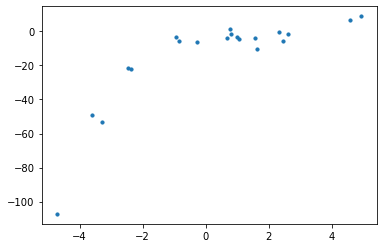

In [33]:
# load libraries
import numpy as np
import matplotlib.pyplot as plt

# generate randomly distributed polynomial data
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# plot data
plt.scatter(x,y, s=10)
plt.show()

The data appears to be non-linear, with a single or maybe double curve in it's distribution, but let's try using a linear regression to see how well a simplistic, straight-line model fits our dataset.

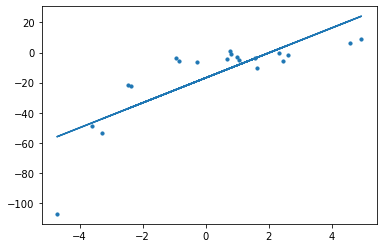

RMSE:  15.908242501429998
r-squared:  0.6386750054827146


In [34]:
# generate randomly distributed polynomial data
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transform data to fit model
x = x[:, np.newaxis] # turn 1D array from one row to many rows
y = y[:, np.newaxis] # literally add a dimension (1D to 2D)

# load libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# build model object
regr = LinearRegression()

# fit model to data
regr.fit(x, y)

# predict regression line
y_pred = regr.predict(x)

# plot data
plt.scatter(x, y, s=10)
plt.plot(x, y_pred)
plt.show()

# calculate accuracy/error of regression line
print("RMSE: ", mean_squared_error(y, y_pred, squared=False))
print("r-squared: ", r2_score(y, y_pred))

You can see that the straight line is under-fitting our data. It doesn't describe the main cluster of data particularly well and also fails to account for the extreme low values at the start of our x-values. The r-squared and RMSE scores show that it's not fitting our data particularly well too with r-squared at 64% whilst our RMSE (i.e. the standard deviation of our error) being quite high at 15.

Instead, let's attempt to fit a polynomial function to our data and see how that improves the results. Here, we are simply increasing the complexity of the model. So whilst the formula of a straight line is

$$ y = \theta_0\ + \theta_1x\ $$

The equation of a polynomial (the simplest possible, a second degree function) could be

$$ y = \theta_0\ + \theta_1x\ + ... + \theta_nx^n\ $$

Here, $ \theta_0\ $ is the bias (more later), the other $ \theta\ $ values are the co-efficients of each feature and $ n $ is the degree of the polynomial

**NOTE:** In truth, the above function is still linear as the parameters/co-efficients/weights of $\theta\$ and the single x feature are linear, it's just that the function we're fitting is quadratic in nature.

(PolyReg 2D) RMSE:  10.120437473614711
(PolyReg 2D) r-squared:  0.8537647164420812


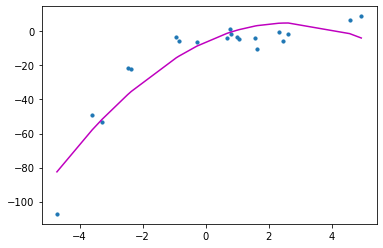

In [49]:
# generate randomly distributed polynomial data
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transform data to fit model
x = x[:, np.newaxis] # turn 1D array from one row to many rows
y = y[:, np.newaxis] # literally add a dimension (1D to 2D)

# load libraries
import operator
from sklearn.preprocessing import PolynomialFeatures

# define degree of polynomial (e.g. if degree is 2, generate [1, a, b, a^2, b^2, ab] matrix)
polynomial_features = PolynomialFeatures(degree=2)

# apply 2nd degree polynomial function to features
x_poly_2 = polynomial_features.fit_transform(x)

# build model object
model = LinearRegression()

# fit model to polynomial data
model.fit(x_poly_2, y)

# make polynomial predictions
y_poly_pred_2 = model.predict(x_poly_2)

# calculate error
print("(PolyReg 2D) RMSE: ", mean_squared_error(y, y_poly_pred_2, squared=False))
print("(PolyReg 2D) r-squared: ", r2_score(y, y_poly_pred_2))

# plot data
plt.scatter(x, y, s=10)
sort_axis = operator.itemgetter(0) # sort the values of x before line plot
sorted_zip = sorted(zip(x, y_poly_pred_2), key=sort_axis)
x_2, y_poly_pred_2 = zip(*sorted_zip)
plt.plot(x_2, y_poly_pred_2, color='m')
plt.show()

You can clearly see that the 2 degree polynomial is a better fit for the data than the linear regression, the RMSE and r-squared values back this up.

An alternative way to running the code above is below, this method uses a pipeline instead to simplify the process. I've also adjusted the degrees of the polynomial to use a 3 degree function and assess the accuracy of this in comparison with the above, 2 degree model.

(PolyReg 3D) RMSE:  3.449895507408724
(PolyReg 3D) r-squared:  0.9830071790386679


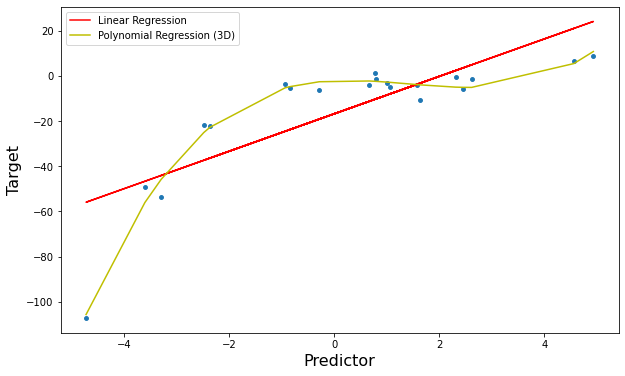

In [51]:
# generate randomly distributed polynomial data
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transform data to fit model
x = x[:, np.newaxis] # turn 1D array from one row to many rows
y = y[:, np.newaxis] # literally add a dimension (1D to 2D)

# load libraries
from sklearn.pipeline import Pipeline

# define components of pipeline
stages = [('poly', PolynomialFeatures(degree=3)), ('model', LinearRegression())]

# create pipeline
pipe = Pipeline(stages)

# fit pipeline stages to data
pipe.fit(x, y)

# make predictions (i.e. regression curve)
y_poly_pred_3 = pipe.predict(x)

# calculate error
print("(PolyReg 3D) RMSE: ", mean_squared_error(y, y_poly_pred_3, squared=False))
print("(PolyReg 3D) r-squared: ", r2_score(y, y_poly_pred_3))

# sort predicted values with respect to predictor
sorted_zip = sorted(zip(x, y_poly_pred_3)) # create sorted 2d array of x and pred
x_poly_3, y_poly_pred_3 = zip(*sorted_zip) # * is the unpacking operator, it splits both parts of each tuple into sep. arrays

# plot data
plt.figure(figsize=(10,6))
plt.scatter(x,y,s=15)
plt.plot(x, y_pred, color='r', label='Linear Regression')
#plt.plot(x_poly_2, y_poly_pred_2, color='g',label='Polynomial Regression (2D)')
plt.plot(x_poly_3, y_poly_pred_3, color='y',label='Polynomial Regression (3D)')
plt.xlabel('Predictor', fontsize=16)
plt.ylabel('Target', fontsize=16)
plt.legend()
plt.show()

Increasing the degrees of the polynomial results in an even more accurate prediction of our data, you can see that our r-squared value has increased to 98% which is very high whilst our RMSE (standard deviation of error) has dropped significantly to just under 3.5. One thing to be cautious of here though is over-fitting, you can in theory increase your degrees of polynomials until you achieve a perfect line with a 100% fit, but whilst this model would perfectly fit your sample data, it would likely be a poor predictor of real world data. During overfitting, the model is so sensitive that it picks up noise from the dataset that is not relevant to the general patterns you're trying to detect. You can prevent overfitting by reducing the degrees of your polynomial but also by increasing your sample size to help your model identify the major patterns and ignore the noise.

Conversely, you don't want to pick a polynomial with too low a fit, as this would be under-fitted and wouldn't be correctly identifying patterns in your dataset.

However, even with all of this said, there are a few things to be considered when picking the optimum parameters for our model.

## Bias vs. Variance (The Classic Trade-Off)
**Bias** is the error associated with underfitting. Essentially, if your model is too simplistic, it will fail to pick up the significant patterns and relationships between your features and targets/labels and as such will be a poor predictor of new samples.

**Variance** is the error associated with overfitting. Here, your line/curve passes through almost every point, making it an excellent predictor of your sample set, but it also picks up lots of noise and makes it incredibly sensitive to new data, thus making it a poor predictor of real-world data.

An ideal model would be simplistic (i.e. few degrees, assumptions etc.) and have low bias and variance, but this is often not possible in the real-world therefore there must be a trade-off where you have medium to low bias and variance as the model complexity increases.

## Boston Housing Data
Let's apply what we've demonstrated above to some real data.

In [86]:
# load libraries and data
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import pandas as pd

# load data
boston_data = load_boston()

# convert to df
boston = pd.DataFrame(boston_data['data'], columns=boston_data['feature_names'])

# extract features and targets
X = boston[['LSTAT', 'RM']]
y = boston_data['target']

# split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

# define a function which creates a polynomial regression for the given degree
def polynomial(degree):    
    # build pipeline
    stages = [('poly', PolynomialFeatures(degree=degree)), ('model', LinearRegression())]
    
    # create pipeline
    pipe = Pipeline(stages)
    
    # fit pipeline to data
    pipe.fit(X_train, y_train)
    
    # make predictions using model
    y_train_pred = pipe.predict(X_train)
    y_test_pred = pipe.predict(X_test)
    
    # calculate training error
    print("Training RMSE: ", mean_squared_error(y_train, y_train_pred, squared=False))
    print("Training r-squared: ", r2_score(y_train, y_train_pred))
    
    # calculate test error
    print("Test RMSE: ", mean_squared_error(y_test, y_test_pred, squared=False))
    print("Test r-squared: ", r2_score(y_test, y_test_pred))

# call function for various degrees
polynomial(2)

Training RMSE:  4.703071027847755
Training r-squared:  0.7425094297364766
Test RMSE:  3.7848198845450263
Test r-squared:  0.8170372495892192


You can see from the scores above that our final model scores are pretty high and this is a far better model than using a simple linear regression.